# Confidence Intervals for Means

Sample Mean: 2.34 seconds
95% Confidence Interval: [2.23, 2.45] seconds


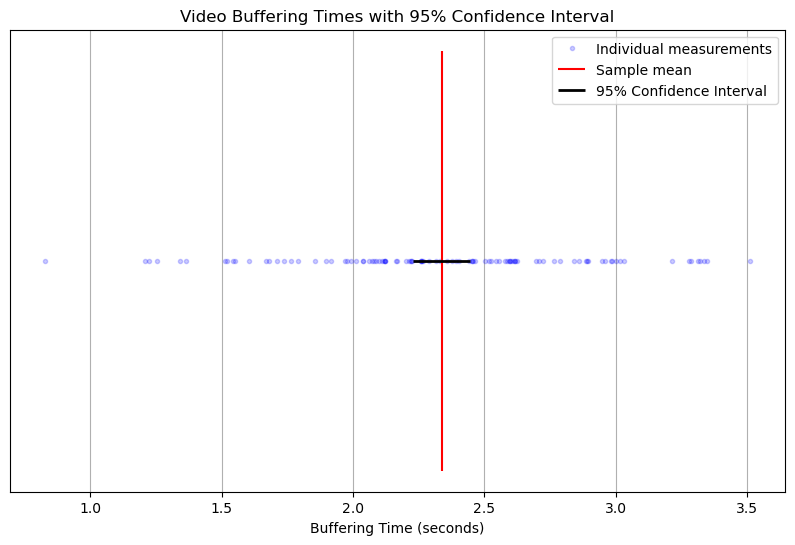

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Simulate 100 buffering times with mean 2.4 seconds and std dev 0.6 seconds
# In reality, this would be your actual collected data
np.random.seed(42)  # For reproducibility
buffering_times = np.random.normal(loc=2.4, scale=0.6, size=100)

# Calculate the basics
sample_mean = np.mean(buffering_times)
sample_std = np.std(buffering_times, ddof=1)  # ddof=1 for sample standard deviation
sample_size = len(buffering_times)

# Calculate 95% confidence interval using scipy.stats
# The interval function handles all the t-distribution calculations for us
confidence_level = 0.95
ci = stats.t.interval(confidence_level,
                     df=sample_size-1,  # Degrees of freedom
                     loc=sample_mean,    # Center point (sample mean)
                     scale=stats.sem(buffering_times))  # Standard error

print(f"Sample Mean: {sample_mean:.2f} seconds")
print(f"95% Confidence Interval: [{ci[0]:.2f}, {ci[1]:.2f}] seconds")

# Let's visualize this to make it more intuitive
plt.figure(figsize=(10, 6))

# Plot the individual data points
plt.plot(buffering_times, np.zeros_like(buffering_times), 'b.', alpha=0.2,
         label='Individual measurements')

# Plot the mean and confidence interval
plt.vlines(sample_mean, -0.1, 0.1, colors='red', label='Sample mean')
plt.hlines(0, ci[0], ci[1], colors='black', linewidth=2,
          label='95% Confidence Interval')

# Add labels and formatting
plt.xlabel('Buffering Time (seconds)')
plt.title('Video Buffering Times with 95% Confidence Interval')
plt.legend()

# Remove y-axis as it's not meaningful in this visualization
plt.gca().get_yaxis().set_visible(False)

plt.grid(True, axis='x')
plt.show()